In [ ]:
for i in range(10):
    if i%2 == 0:
        print("even number")
    else:
        print("odd number")

In [ ]:
print("hello world")

Ridge:0.7046128837423021
Lasso:0.6592064167473799
LinearRegression:0.7125140936111222
Ridge:4.736323065675368
Lasso:5.087345674163961
LinearRegression:4.6725485540096265


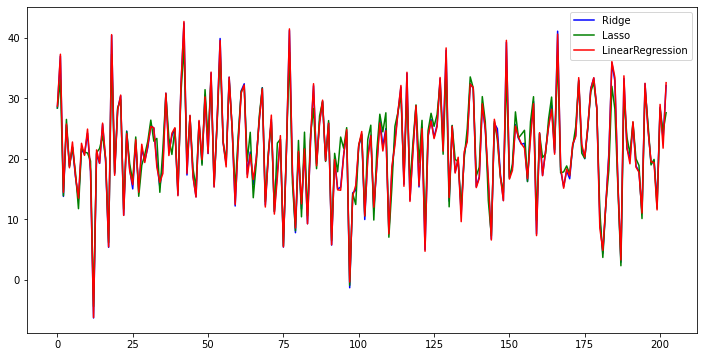

In [3]:
from cProfile import label
from turtle import color
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()

x = boston.data
y = boston.target


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)


model = Ridge()
model.fit(x_train, y_train)

model1 = Lasso()
model1.fit(x_train, y_train)

model2 = LinearRegression()
model2.fit(x_train, y_train)

pred = model.predict(x_test)
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

r2_ri = r2_score(y_test, pred)
r2_la = r2_score(y_test, pred1)
r2_li = r2_score(y_test, pred2)


rmse_ri = np.sqrt(mean_squared_error(y_test, pred))
rmse_la = np.sqrt(mean_squared_error(y_test, pred1))
rmse_li = np.sqrt(mean_squared_error(y_test, pred2))


print(f"Ridge:{r2_ri}")
print(f"Lasso:{r2_la}")
print(f"LinearRegression:{r2_li}")

print(f"Ridge:{rmse_ri}")
print(f"Lasso:{rmse_la}")
print(f"LinearRegression:{rmse_li}")

fig = plt.figure(figsize = (12, 6))
plt.plot(pred, color = "blue", label = "Ridge")
plt.plot(pred1, color = "green", label = "Lasso")
plt.plot(pred2, color = "red", label = "LinearRegression")
plt.legend()
plt.show()





Ridge:0.7122243591781483
Lasso:0.6554170147114655
LinearRegression:0.715221838825688
Ridge:4.866808595586374
Lasso:5.345099118759616
LinearRegression:4.842789010984501


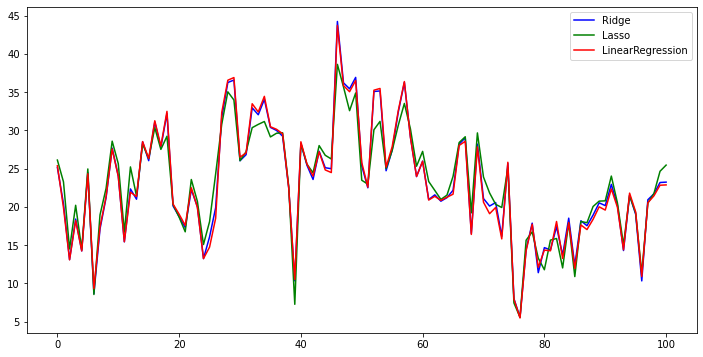

In [11]:
from cProfile import label
from turtle import color
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()

x = boston.data
y = boston.target

li_ri_r2 = []
li_la_r2 = []
li_li_r2 = []

li_ri_rmse =[]
li_la_rmse =[]
li_li_rmse =[]


kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

for train_data, test_data in kf.split(x, y):
    x_train, x_test = x[train_data], x[test_data]
    y_train, y_test = y[train_data], y[test_data]
   

    model = Ridge()
    model.fit(x_train, y_train)

    model1 = Lasso()
    model1.fit(x_train, y_train)

    model2 = LinearRegression()
    model2.fit(x_train, y_train)

    pred = model.predict(x_test)
    pred1 = model1.predict(x_test)
    pred2 = model2.predict(x_test)

    r2_ri = r2_score(y_test, pred)
    r2_la = r2_score(y_test, pred1)
    r2_li = r2_score(y_test, pred2)

    rmse_ri = np.sqrt(mean_squared_error(y_test, pred))
    rmse_la = np.sqrt(mean_squared_error(y_test, pred1))
    rmse_li = np.sqrt(mean_squared_error(y_test, pred2))

    li_ri_r2.append(r2_ri)
    li_la_r2.append(r2_la)
    li_li_r2.append(r2_li)

    li_ri_rmse.append(rmse_ri)
    li_la_rmse.append(rmse_la)
    li_li_rmse.append(rmse_li)

    
print(f"Ridge:{np.mean(li_ri_r2)}")
print(f"Lasso:{np.mean(li_la_r2)}")
print(f"LinearRegression:{np.mean(li_li_r2)}")

print(f"Ridge:{np.mean(li_ri_rmse)}")
print(f"Lasso:{np.mean(li_la_rmse)}")
print(f"LinearRegression:{np.mean(li_li_rmse)}")

fig = plt.figure(figsize = (12, 6))
plt.plot(pred, color = "blue", label = "Ridge")
plt.plot(pred1, color = "green", label = "Lasso")
plt.plot(pred2, color = "red", label = "LinearRegression")
plt.legend()
plt.show()






    



